In [1]:
# librerias
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA
from statsmodels.tsa.statespace import sarimax

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_percentage_error

from pyquirrinds import pickleizer


In [3]:
df= pd.read_csv(r'C:\Users\nicoc\Desktop\TheBridge\thebridge_ft_sep22\6-Productivizacion\Entregas\data\users_web.csv')
df.index= pd.to_datetime(df.Date, dayfirst=True) #Dayfirst para arreglar el problema de los meses
df= df.drop('Date', axis=1);
df.shape

(851, 1)

In [4]:
df['Users_log'] = np.log(df['Users'], where= df['Users']>0 )
df['Users_log'].fillna(0, inplace=True)
df

,Users,Users_log
Date,,
2020-01-01,13,2.564949
2020-01-02,17,2.833213
2020-01-03,13,2.564949
2020-01-04,4,1.386294
2020-01-05,10,2.302585
...,...,...
2022-04-26,63,4.143135
2022-04-27,64,4.158883
2022-04-28,46,3.828641


In [5]:
df.isna().sum()

Users        0
Users_log    0
dtype: int64

In [6]:
train= df[:-70]
test=df[-70:]
test.to_csv('test.csv')
train.head()
test.head(5)

,Users,Users_log
Date,,
2022-02-20,38,3.637586
2022-02-21,52,3.951244
2022-02-22,57,4.043051
2022-02-23,58,4.060443
2022-02-24,54,3.988984


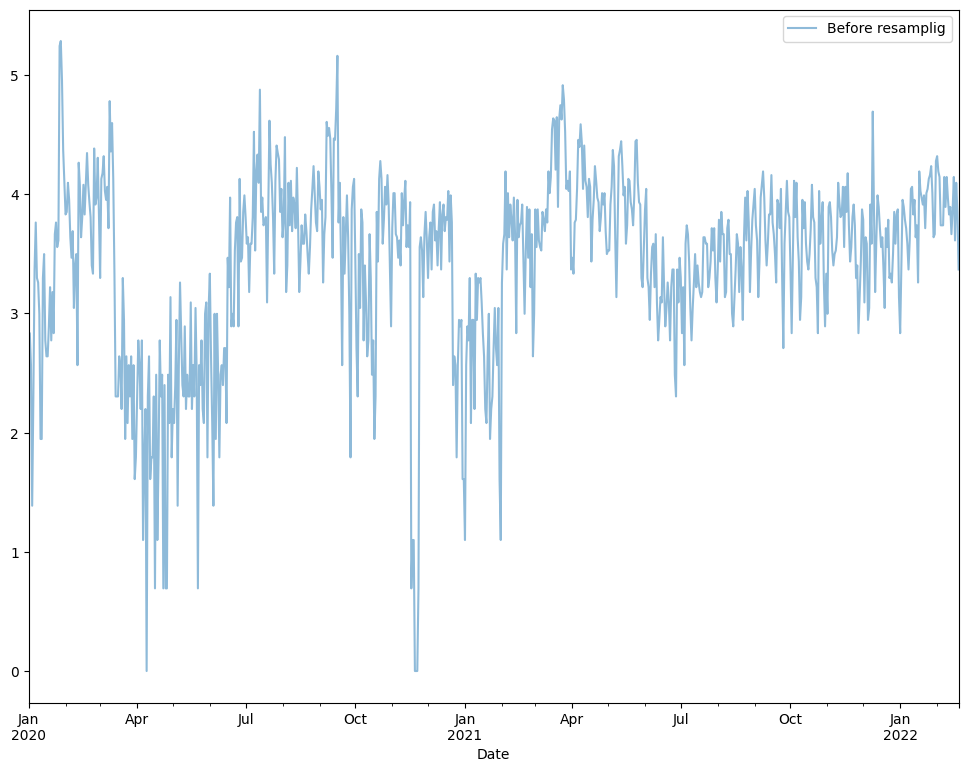

In [106]:
#Parece que los datos tienen mucho ruido. Se reduce considerablemente con un resample de dos semanas
fig, ax= plt.subplots(1,1)
fig =train['Users_log'].plot(style= '-', figsize=(12,9), ax=ax, alpha=0.5)
fig.legend(['Before resamplig', 'After resampling'])
plt.show();

In [100]:
"""train= train.resample('SM').mean()
print('Nulos tras el resample',train.isna().sum()[0])"""

Nulos tras el resample 0


In [86]:
train = train['Users_log']
test = test['Users_log']

In [108]:
print('p-value en el AD test: ',adfuller(train['Users_log'])[1])
#No es stationary puesto que el p-valor es menor que 0.05

p-value en el AD test:  0.01939664707603925


<Figure size 700x300 with 0 Axes>

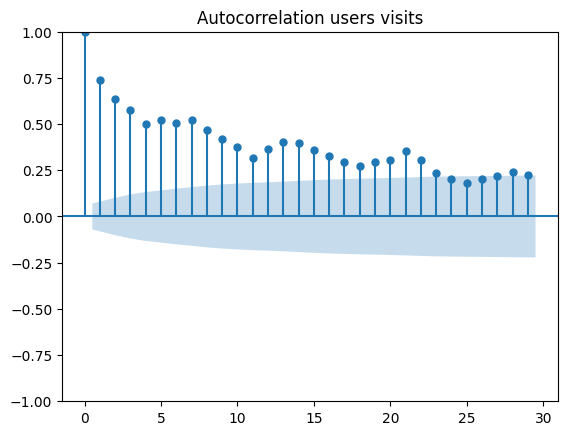

In [110]:
#Por ultimo comprobamos si hay seasonality con un plot de autocorrelacion
plt.figure(figsize=(7,3))
plot_acf(train['Users_log'], use_vlines= True, title= 'Autocorrelation users visits');

#Hay correlacion y por tanto seasonality
#Ciclos de 7 (3,5 meses). ¿Aproximadamente lo que dura un bootcamp?

In [104]:
#Para la parte del modelo unsaremos un ARIMA porque hay seasonality. 
#PAra dar con los parametros más adecuados intentaremos hacer uan especie de gridsearch

In [37]:
"""
# Estos son los valores que se probaran
def sarima_configs(seasonal=[0]):
 models = []
 # define config lists
 start_p = [0,1]
 start_q = [0,1]
 max_d = [4,5]
 max_p = [4,5]
 max_q = [4,5]
 msearch = [2,3,4]

 # create config instances
 for p in start_p:
    for q in start_q:
        for d in max_d:
            for P in max_p:
                for Q in max_q:
                    for m in msearch:
                        cfg = [p,q,d,P, Q,m]
                        models.append(cfg)
 return models

parametros=sarima_configs()
len(parametros)
"""

96

# Sobre todo trastea cambiadno start_p, start_q y max_d

In [7]:
# Estos son los valores que se probaran
def sarima_configs(seasonal=[0]):
 models = []
 # define config lists
 start_p = [0,1,2,3,4]
 start_q = [0,1,2,3,4]
 max_d = [1,2,3]

 # create config instances
 for p in start_p:
    for q in start_q:
        for d in max_d:
                        cfg = [p,q,d]
                        models.append(cfg)
 return models

parametros=sarima_configs()
len(parametros)

75

In [110]:
#test = test.resample('SM').mean()

In [72]:
"""
#Y este el modelo
def arima(train, params, test):
    results=[]
    model = auto_arima(
        train,
        start_p = params[0],
        start_q = params[1],
        max_d = params[2],
        max_p = params[3],
        max_q = params[4],
        m = params[5],
        trace=False,
        stepwise=True)
    
    prediction=model.predict(test.shape[0])
    results.append(prediction)
    return results
    """

In [8]:
#Y este el modelo
def arima(train, params, test):
    results=[]
    model = auto_arima(
        train,
        start_p = params[0],
        start_q = params[1],
        max_d = params[2],
        trace=False,
        stepwise=True)
    
    prediction=model.predict(test.shape[0])
    results.append(prediction)
    return results

In [9]:
#Con un bucle for se puede ir itereando y guardando los resultados
resultados=[]
n=1
for i in parametros:
    print('Vuelta', n)
    results= arima(train['Users_log'], i, test['Users_log'])
    resultados.append(results)
    n=n+1

Vuelta 1
Vuelta 2
Vuelta 3
Vuelta 4
Vuelta 5
Vuelta 6
Vuelta 7
Vuelta 8
Vuelta 9
Vuelta 10
Vuelta 11
Vuelta 12
Vuelta 13
Vuelta 14
Vuelta 15
Vuelta 16
Vuelta 17
Vuelta 18
Vuelta 19
Vuelta 20
Vuelta 21
Vuelta 22
Vuelta 23
Vuelta 24
Vuelta 25
Vuelta 26
Vuelta 27
Vuelta 28
Vuelta 29
Vuelta 30
Vuelta 31
Vuelta 32
Vuelta 33
Vuelta 34
Vuelta 35
Vuelta 36
Vuelta 37
Vuelta 38
Vuelta 39
Vuelta 40
Vuelta 41
Vuelta 42
Vuelta 43
Vuelta 44
Vuelta 45
Vuelta 46
Vuelta 47
Vuelta 48
Vuelta 49
Vuelta 50
Vuelta 51
Vuelta 52
Vuelta 53
Vuelta 54
Vuelta 55
Vuelta 56
Vuelta 57
Vuelta 58
Vuelta 59
Vuelta 60
Vuelta 61
Vuelta 62
Vuelta 63
Vuelta 64
Vuelta 65
Vuelta 66
Vuelta 67
Vuelta 68
Vuelta 69
Vuelta 70
Vuelta 71
Vuelta 72
Vuelta 73
Vuelta 74
Vuelta 75


In [91]:
test.shape

(70, 1)

In [10]:
n=0
errores={
    'Error':[],
    'Parametros':[]
}
ers=[]
params=[]
for i in resultados:
    error= mean_absolute_percentage_error(test['Users_log'],i[0][:])
    ers.append(error)
    params.append(parametros[n])
    n=n+1
errores={
    'Error':ers,
    'Parametros':parametros
}
models= pd.DataFrame(errores).sort_values('Error', ascending=True)

In [11]:
models.head(40)

,Error,Parametros
0,0.057541,"[0, 0, 1]"
54,0.057541,"[3, 3, 1]"
53,0.057541,"[3, 2, 3]"
52,0.057541,"[3, 2, 2]"
51,0.057541,"[3, 2, 1]"
50,0.057541,"[3, 1, 3]"
49,0.057541,"[3, 1, 2]"
55,0.057541,"[3, 3, 2]"
48,0.057541,"[3, 1, 1]"
46,0.057541,"[3, 0, 2]"


In [21]:
resultados[0]

[2022-02-20    3.552262
 2022-02-21    3.768022
 2022-02-22    3.929807
 2022-02-23    3.969688
 2022-02-24    3.844117
                 ...   
 2022-04-26    3.903813
 2022-04-27    3.944126
 2022-04-28    3.839055
 2022-04-29    3.675323
 2022-04-30    3.571512
 Freq: D, Length: 70, dtype: float64]

In [22]:
predictions= resultados[0]
predictions[0][:]
predictions2 = pd.DataFrame(predictions)
predictions2 = predictions2.transpose()
predictions2

,0
2022-02-20,3.552262
2022-02-21,3.768022
2022-02-22,3.929807
2022-02-23,3.969688
2022-02-24,3.844117
...,...
2022-04-26,3.903813
2022-04-27,3.944126
2022-04-28,3.839055
2022-04-29,3.675323


In [23]:
train = train['Users_log']
test = test['Users_log']

KeyError: 'Users_log'

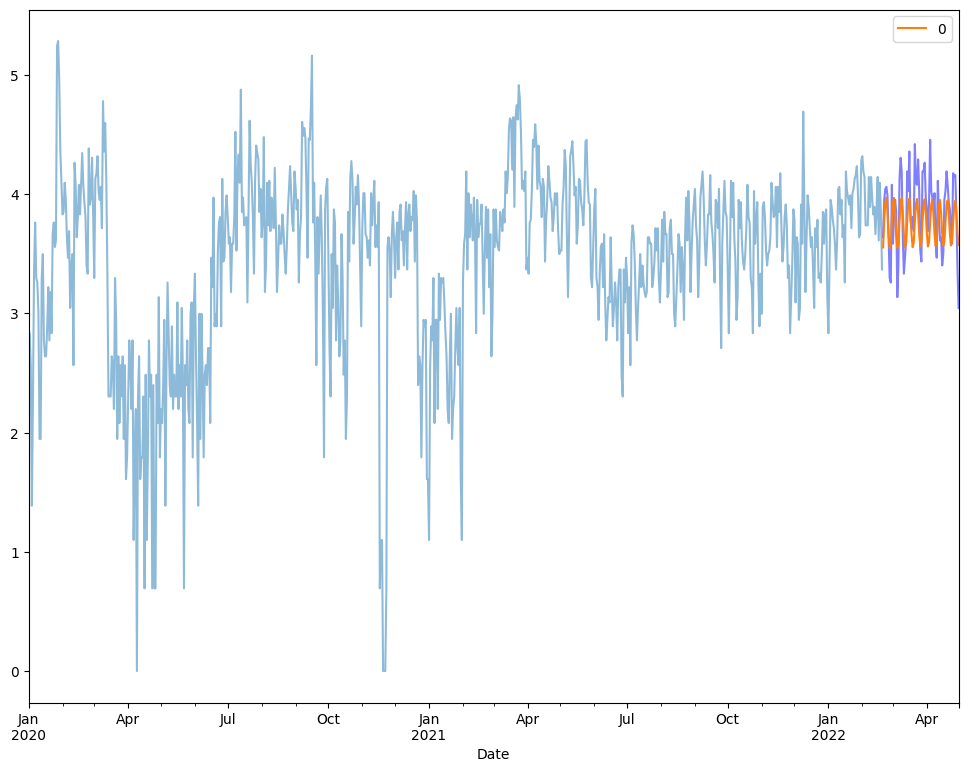

In [24]:

fig, ax= plt.subplots(1,1)
fig =train.plot(style= '-', figsize=(12,9), ax=ax, alpha=0.5)
fig= test.plot(alpha=0.5, style= '-', color= 'blue', ax=ax)
fig= predictions2.plot(ax=ax)
plt.show();

In [92]:
models['Parametros'][0]

[0, 0, 1]

In [32]:
model = auto_arima(
        train,
        start_p = best_params[0],
        start_q = best_params[1],
        max_d = best_params[2],
        trace=False,
        stepwise=True)

model

ARIMA(order=(5, 1, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [31]:
pickleizer('modelo_bueno', model)

In [61]:
error.mean()

Users_log   -0.093509
dtype: float64

c:\Users\nicoc\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



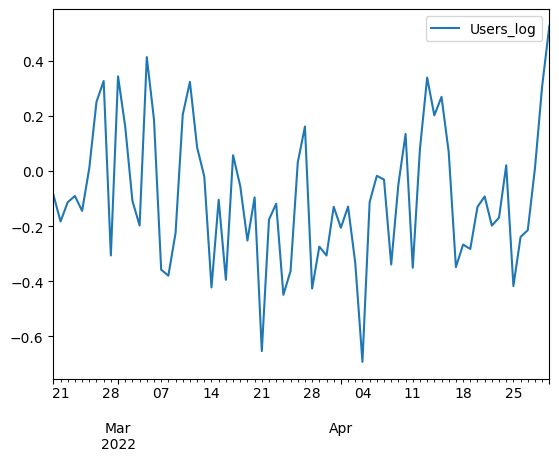

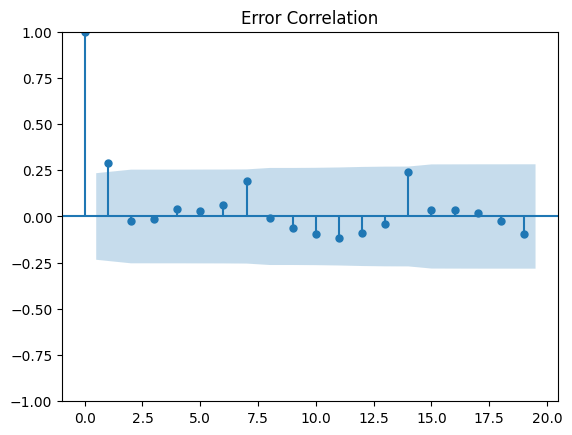

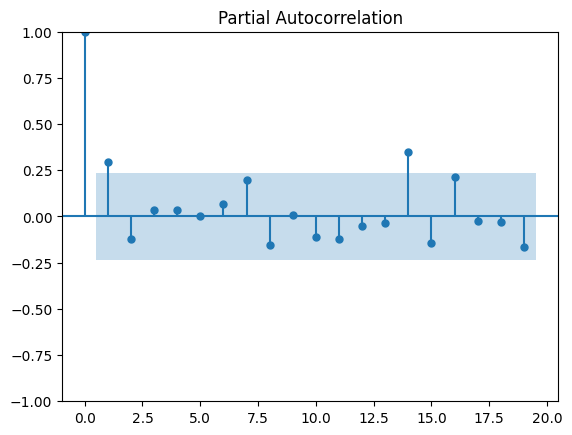

In [60]:
from statsmodels.graphics.tsaplots import plot_pacf
error.plot()
plot_acf(error, use_vlines= True, title= 'Error Correlation')
plot_pacf(error);

In [90]:
adfuller(error)[1]

1.3845192259819238e-06